In [1]:
import random
import json
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import run_analysis
import utils

rms_deviation: 1.5095241300678925
std_difference: 1.501806301536108


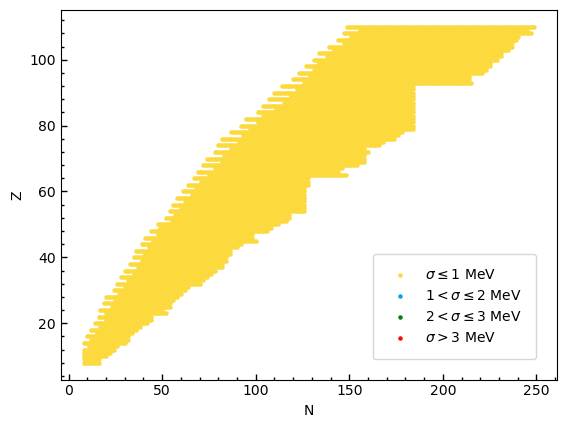

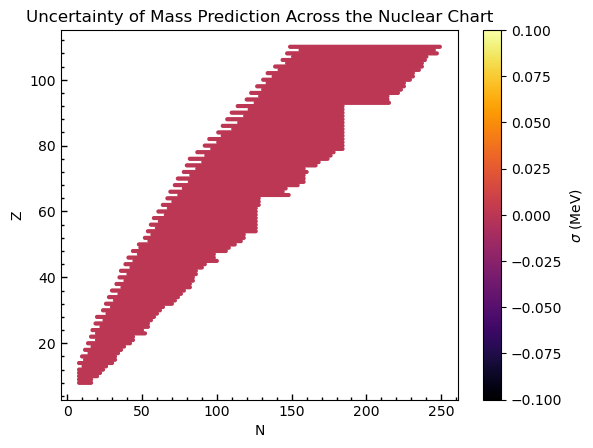

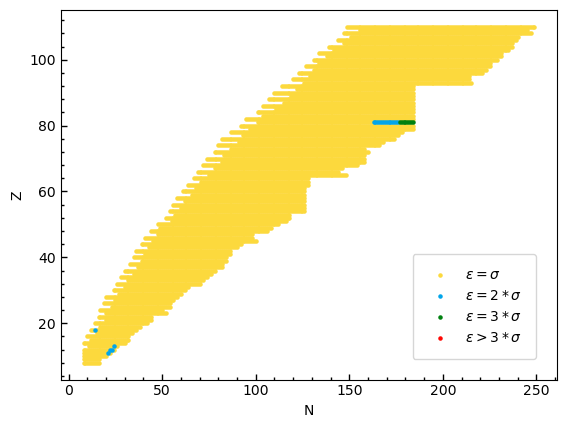

In [2]:
result = ["EXT on diff, code:9186"]
dir = "data/output/"

run_analysis.main(dir + result[0] + ".dat")

In [3]:
file = dir + result[0] + ".dat"
ds = pd.read_csv(file, sep=";")
db = pd.read_csv("data/input/bsk24_mass_table.csv", sep=";")

In [ ]:
ni = 220
zi = 100
mbsk = db[(db["N"] == ni) & (db["Z"] == zi)]["m"]
print(f"m_bsk24: {mbsk}")
run_analysis.plot_histogram_nucleus(ni, zi, ds, resolution=0.01)

KeyError: 'm'

rms_deviation: 1.3557630449783515
std_difference: 1.3479166043530455


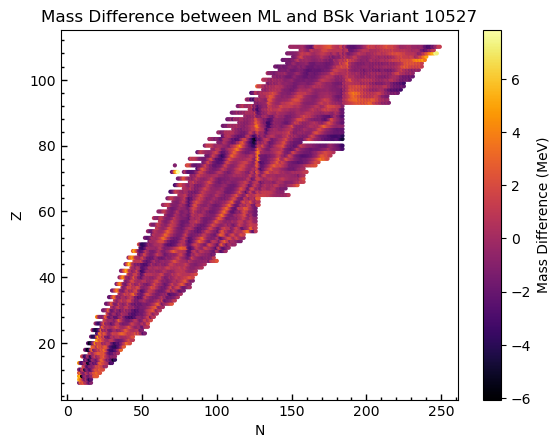

rms_deviation: 1.3736750190887113
std_difference: 1.3701466169479668


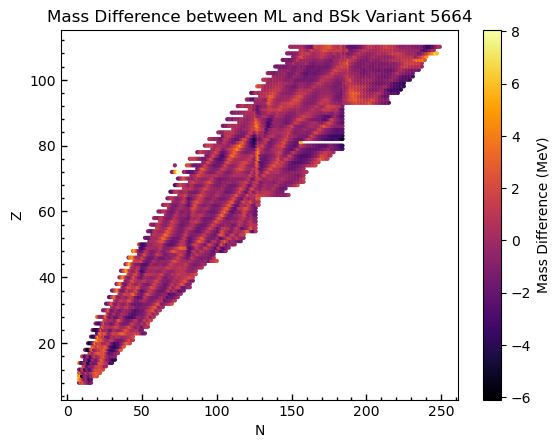

rms_deviation: 1.413457622397671
std_difference: 1.4135657852987826


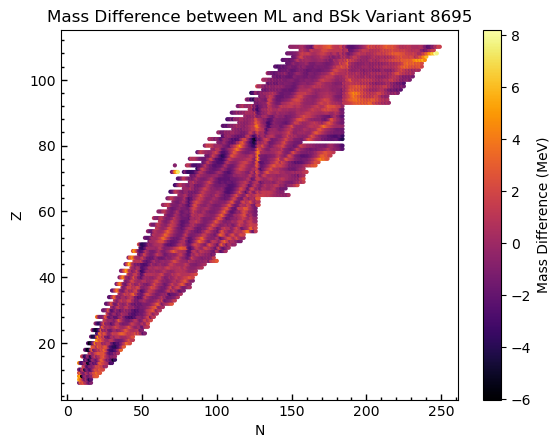

rms_deviation: 1.479685952258446
std_difference: 1.4630012181864345


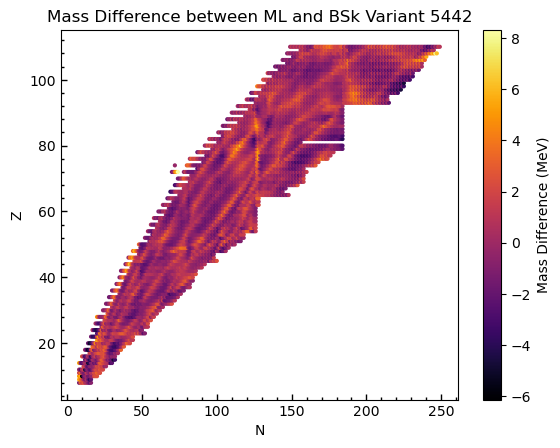

rms_deviation: 1.8103030991383213
std_difference: 1.6872299500606618


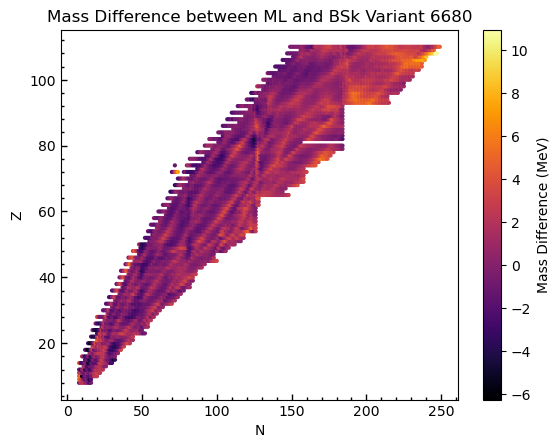

In [28]:
# Analyse the deviation of one variant
import glob

file_pattern = "data/output/Variant_*"

result_one = glob.glob(file_pattern)

for aa in range(len(result_one)):
    analysed = aa
    analysed_variant = result_one[analysed][20:-4]
    dat = pd.read_csv(result_one[analysed], sep=";")
    dat = dat[((dat["Z"] != 81)) | ((dat["Z"] == 81) & (dat["N"] < 157))]
    # dat["sign"] = dat["Difference"].apply(lambda x: -1 if x < 0 else 1)

    rms_dev = np.sqrt((dat["Difference"] ** 2).mean())
    std_diff = dat["Difference"].std()

    fig, ax = plt.subplots()
    scatter = ax.scatter(dat["N"], dat["Z"], c=dat["Difference"], s=4, cmap="inferno")
    colourbar = fig.colorbar(scatter, ax=ax)
    colourbar.set_label("Mass Difference (MeV)")
    ax.set_title(f"Mass Difference between ML and BSk Variant {analysed_variant}")

    ax.set_xlabel("N")
    ax.set_ylabel("Z")
    utils.plot.set_tick(ax)

    print(f"rms_deviation: {rms_dev}")
    print(f"std_difference: {std_diff}")
    fig.savefig(f"variant_{analysed_variant}")
    plt.show()

    # import plotly.express as px
    # import pandas as pd
    # import numpy as np

    # # Assuming result_one and aa are already defined, and dat is read correctly
    # analysed = aa
    # analysed_variant = result_one[analysed][20:-4]
    # dat = pd.read_csv(result_one[analysed], sep=";")

    # rms_dev = np.sqrt((dat["Difference"] ** 2).mean())
    # std_diff = dat["Difference"].std()

    # # Create the interactive scatter plot with plotly
    # fig = px.scatter(
    #     dat,
    #     x="N",
    #     y="Z",
    #     color="Difference",
    #     color_continuous_scale="inferno",
    #     title=f"Difference between Variant {analysed_variant} and BSk24+Perturbation on That Variant",
    #     labels={"N": "N", "Z": "Z", "Difference": "Difference"},
    # )

    # # Add the RMS deviation and standard difference as annotations
    # fig.add_annotation(
    #     x=0.5,
    #     y=1.05,
    #     xref="paper",
    #     yref="paper",
    #     text=f"RMS Deviation: {rms_dev:.4f}<br>Std Difference: {std_diff:.4f}",
    #     showarrow=False,
    #     font=dict(size=12),
    # )

    # fig.update_layout(xaxis_title="N", yaxis_title="Z")

    # # Show the plot
    # fig.show()

    # # Print the numerical values as you were doing before
    # print(f"rms_deviation: {rms_dev}")
    # print(f"std_difference: {std_diff}")

rms_deviation: 6.6511093794113725
std_difference: 5.90184798681107
             Difference     BSk24
Z     N                          
8.0   8.0     -0.383780  0.034929
      9.0      3.173398  0.036989
      10.0     3.022354  0.048300
      11.0     6.593480  0.068892
      12.0     5.805333  0.059346
...                 ...       ...
110.0 245.0  -10.060003  2.807452
      246.0   -8.928142  2.858407
      247.0   -7.568252  2.864776
      248.0   -6.045213  2.921869
      249.0   -3.285790  2.926984

[6425 rows x 2 columns]


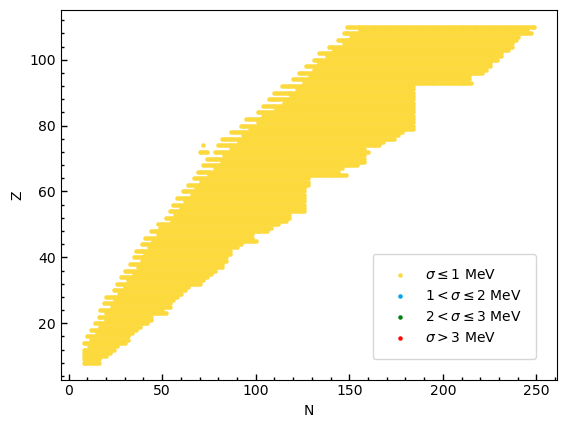

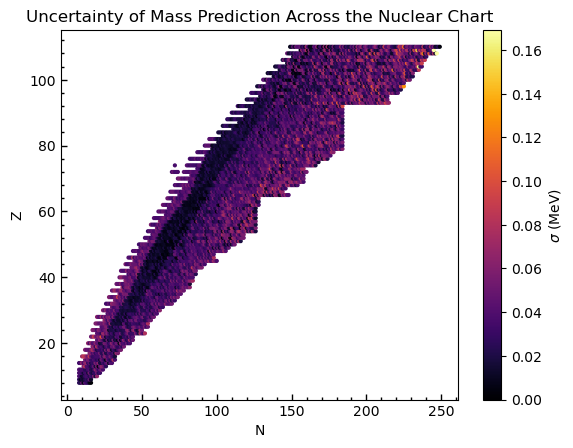

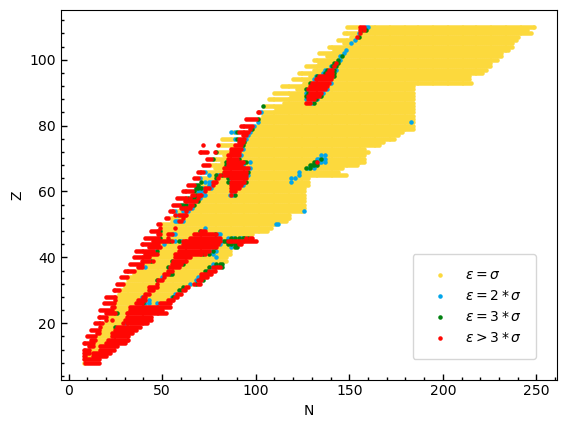

In [54]:
ff = "data/output/EXT 24 run custom loss, code: 369.dat"
ssd = pd.read_csv(ff, sep=";")
run_analysis.main(ff)

m_bsk24: 83.2


ValueError: cannot convert float NaN to integer

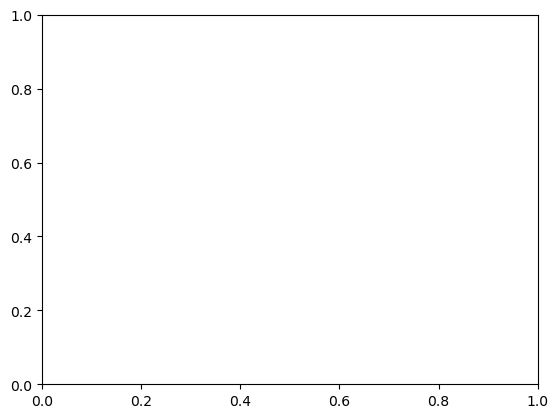

In [70]:
ni = 126
zi = 100
mbsk = db[(db["N"] == ni) & (db["Z"] == zi)]["m"]
print(f"m_bsk24: {mbsk.iloc[0]}")

run_analysis.plot_histogram_nucleus(ni, zi, ssd, resolution=0.05)